<a href="https://colab.research.google.com/github/ZiaNova/Projects-to-Share/blob/master/Churn_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preprocessing: deleting columns with no predictive power and categorical variables

```
# This is formatted as code
```



In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/Python-Bootcamp/master/data/Telco-Customer-Churn.csv')
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
churn_df = df.drop('customerID', axis=1)  
df_dummified = pd.get_dummies(churn_df, drop_first=True)  
df_dummified.rename(columns={'Churn_Yes': 'Churn'}, inplace=True)  
df_dummified.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,29.850000,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.500000,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.150002,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.750000,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.649994,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


Create feature matrix and target vector
Split the data into train and test with a 70-30 split

In [ ]:
X_df = df_dummified.drop('Churn', axis=1)
y_df = df['Churn']

In [ ]:
print("X_df:", X_df.shape)
print("y_df:", y_df.shape)

X_df: (7043, 30)
y_df: (7043,)


Split the data into train and test with a 70-30 split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_df, y_df, test_size=0.3, random_state=833)

In [ ]:
from sklearn.naive_bayes import GaussianNB

Initiate and fit the model

In [ ]:
from sklearn.linear_model import LogisticRegression  
model = LogisticRegression(solver='liblinear') 

In [ ]:
model.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_model = model.predict(Xtest)

Instantiate and fit the model
Make predictions and find the overall accuracy on your test set

In [ ]:
test = Xtest.join(ytest).reset_index()
test.join(pd.Series(y_model, name='predicted')).head()

,index,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,predicted
0,684,0,1,71.10,71.099998,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,No,Yes
1,3717,0,29,48.95,1323.699951,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,No,No
2,1270,0,63,24.65,1574.500000,1,1,1,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,No,No
3,6088,0,1,55.40,55.400002,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,Yes,Yes
4,6441,0,17,55.35,920.500000,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,No,No


In [ ]:
drop_redundant = drop = ['Churn_Yes', 'Churn_No', 'Partner_No',
        'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No',	'MultipleLines_No phone service']

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8031235210601041

In [ ]:
model = GaussianNB()

In [ ]:
model.fit(Xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

Test accuracy and predictions

In [ ]:
y_model = model.predict(Xtest)

In [ ]:
print("Our model is", round(sum(ytest == y_model)/len(y_model),2), "accurate!")

Our model is 0.65 accurate!


Testing

Correlation Model




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


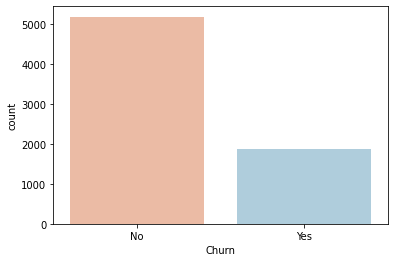

In [ ]:
plt.figure()
sns.countplot(x='Churn', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

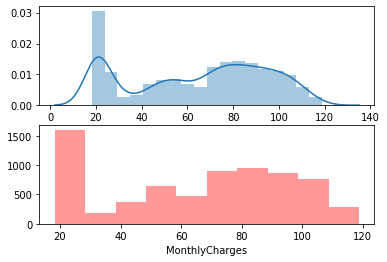

In [ ]:
fig, ax = plt.subplots(2,1)

sns.distplot(df['MonthlyCharges'], ax=ax[0]);
sns.distplot(df['MonthlyCharges'], kde=False, bins=10, color='r', ax=ax[1]);

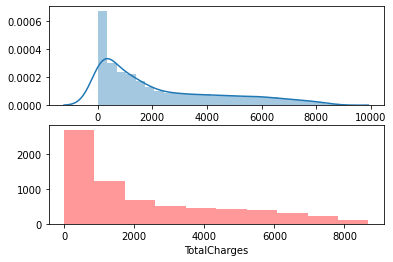

In [ ]:
fig, ax = plt.subplots(2,1)

sns.distplot(df['TotalCharges'], ax=ax[0]);
sns.distplot(df['TotalCharges'], kde=False, bins=10, color='r', ax=ax[1]);

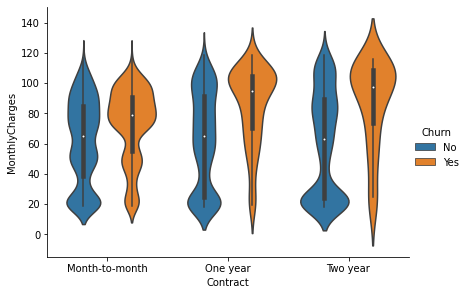

In [ ]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="violin", data=df, height=4.2, aspect=1.4)

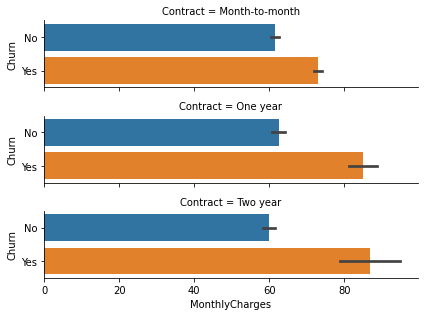

In [ ]:
ax = sns.catplot(y="Churn", x="MonthlyCharges", row="Contract", kind="bar", data=df, height=1.5, aspect=4, orient='h')

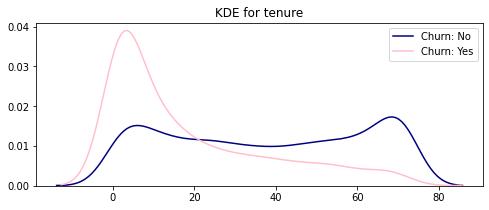

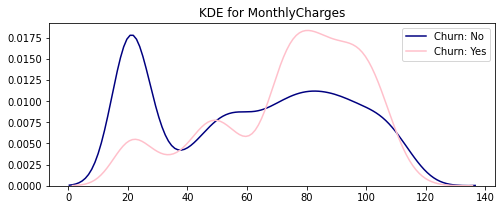

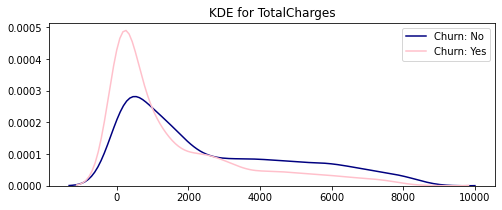

In [ ]:
def kdeplot(feature):
    plt.figure(figsize=(8, 3))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= 'pink', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

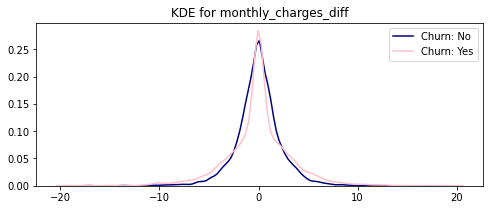

In [ ]:
df['total_charges_to_tenure_ratio'] = df['TotalCharges'] / df['tenure']
df['monthly_charges_diff'] = df['MonthlyCharges'] - df['total_charges_to_tenure_ratio']
kdeplot('monthly_charges_diff')

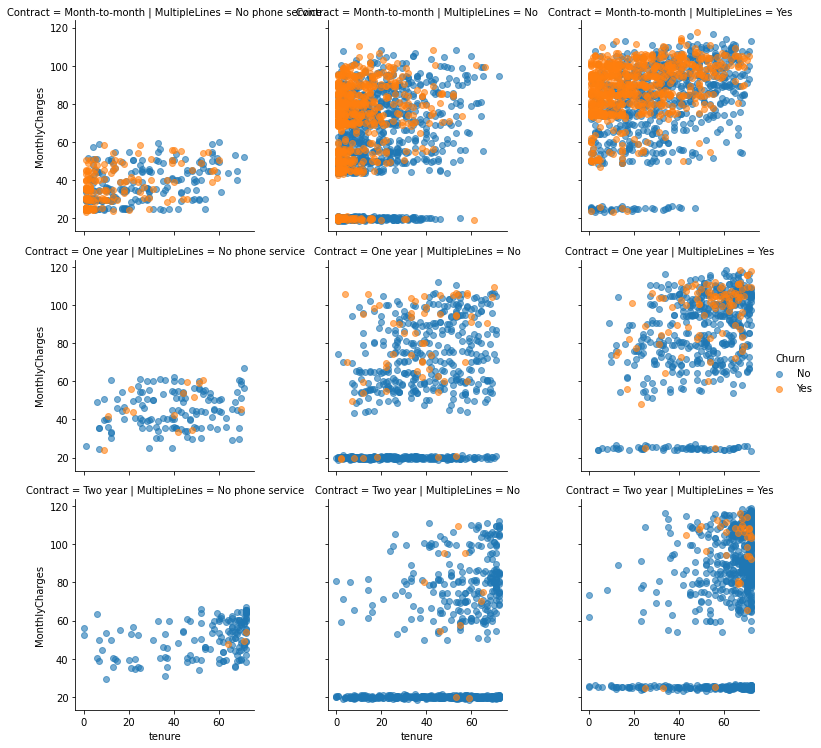

In [ ]:
g = sns.FacetGrid(df, row='Contract', col="MultipleLines", hue="Churn", height=3.5)
g.map(plt.scatter, "tenure", "MonthlyCharges", alpha=0.6)
g.add_legend();

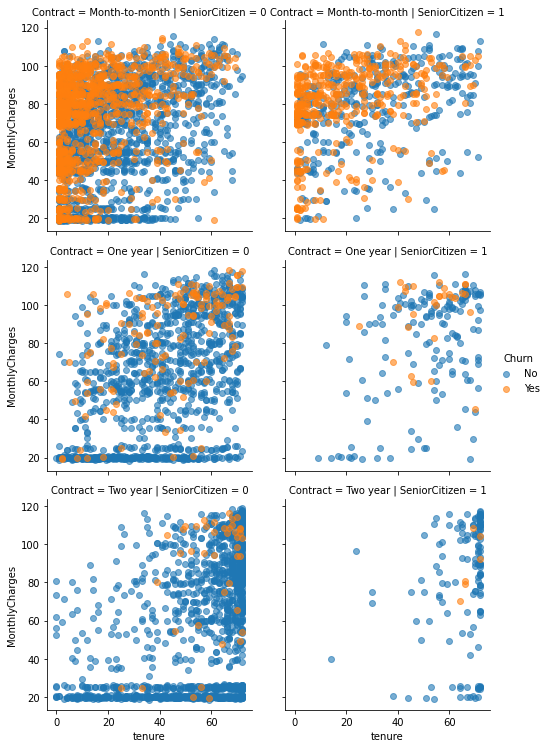

In [ ]:
g = sns.FacetGrid(df, row='Contract', col="SeniorCitizen", hue="Churn", height=3.5)
g.map(plt.scatter, "tenure", "MonthlyCharges", alpha=0.6)
g.add_legend();

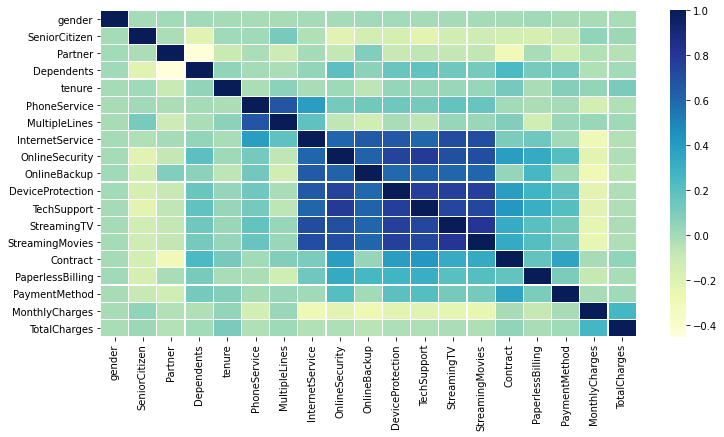

In [ ]:
plt.figure(figsize=(12, 6))
df.drop(['customerID', 'Churn', 'total_charges_to_tenure_ratio', 'monthly_charges_diff'],
        axis=1, inplace=True)
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu")

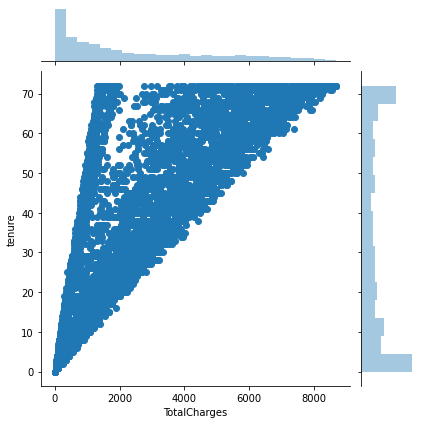

In [ ]:
sns.jointplot(x="TotalCharges", y="tenure", data=df);